# Midterm Project: Exploring COVID-19 Data 🦠



## Due Wednesday, May 4 at 11:59pm


<img src="data/covid.png" width=70%>

Welcome to the Midterm Project! Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is comprehensive, meaning that it draws upon everything we've learned this quarter so far. Second, since problems can vary quite a bit in difficulty, some problems will be worth more points than others. Finally, in a project, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life".

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework. You are especially encouraged to **find a partner** to work through the project with. If you work in a pair, you must follow the [Pair Programming Guidelines](https://dsc10.com/pair-programming/) on the course website. In particular, you must work together at the same time, and you are not allowed to split up the problems and each work on certain problems. If working in a pair, you should submit one notebook to Gradescope for the both of you. Use [this sheet](https://docs.google.com/spreadsheets/d/1Zs1CuHFlhYITrMfD6mSTTH9V27o9Z1WcbYpo0RLvWik/edit?usp=sharing) to find someone else to work with.

**Important:** The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

**Avoid looping through DataFrames. Do not import any packages.** Loops in Python are slow, and looping through DataFrames should usually be avoided in favor of the DataFrame commands we've learned in class, which are much faster. Please do not import any additional packages - you don't need them, and our autograder may not be able to run your code if you do.

As you work through this project, there are a few resources you may want to have open:
- [DSC 10 Course Notes](https://notes.dsc10.com/front.html)
- [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view)
- [`babypandas` documentation](https://babypandas.readthedocs.io/en/latest/)
- Other links in the [Resources](https://dsc10.com/resources/) and [Debugging](https://dsc10.com/debugging/) tabs of the course website

Start early, good luck, and let's get started! 🏃

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import otter
import numbers
import IPython
grader = otter.Notebook()

### Background

During the end of the year 2019, the novel coronavirus started spreading around the world, causing many people to contract COVID-19. It didn't take long for the virus to spread from Wuhan, China to pretty much everywhere else in the world. At first, no one realized the severity of the virus and its potential to change lives as drastically as it has. In February 2020, the number of COVID-19 cases in the United States started to grow exponentially. Various measures, like face covering regulations, stay at home mandates, and vaccines, have helped control the virus, but it still continues to affect the world greatly, even two years later. In the US, there have been over 80 million cases of COVID-19, and nearly 1 million people have died as a result. 

In this project, we will be analyzing COVID-19 data in the United States, using national data from fall 2020, broken down by state and by day. The data we have comes from the [COVID-19 Tracking Project](https://covidtracking.com/), License: CC BY 4.0.

### Outline of the Project 

The project is divided into eight sections, most of which contain several questions. Use the outline below to help you quickly navigate to the part of the project you're working on. Questions are worth one point each, except the questions shown in bold in the outline are worth two points (and you can expect them to be harder, more complex questions).

-  Section 1. [Meet the Data 👋 💾](#part1_section1)  
     - Q1.1
-  Section 2. [Working with `datetime`s 📆 🕗](#part1_section2) 
     - **Q2.1**
-  Section 3. [Exploratory Data Analysis 🔎](#part1_section3)  
     - Q3.1, Q3.2, Q3.3, Q3.4, Q3.5, Q3.6
-  Section 4. [Exponential Growth? 🚀](#part1_section4)  
     - Q4.1, Q4.2, **Q4.3**, Q4.4, Q4.5, **Q4.6**
-  Section 5. [Weekdays vs. Weekends 👔 🆚 🏄](#part1_section5)  
     - Q5.1, **Q5.2**, **Q5.3**, Q5.4, **Q5.5**, Q5.6, Q5.7, Q5.8
-  Section 6. [Rates Per 100,000 People 👩‍🦱👦🏾🧑👩🏿‍🦰👩🏽‍🦱🧔👱‍♀️](#part1_section6) 
     - Q6.1, **Q6.2**, Q6.3, **Q6.4**
-  Section 7. [Mask Mandates 😷](#part1_section7) 
     - Q7.1, **Q7.2**, Q7.3, Q7.4, Q7.5
-  Section 8. [Political Parties 🐘 🐎](#part1_section8) 
     - **Q8.1**, **Q8.2**, Q8.3, Q8.4, Q8.5, Q8.6, Q8.7


<a id='part1_section1'></a>
### Section 1: Meet the Data 👋 💾

Our first step is to read in the data and prepare it for further analysis. 

We have already cleaned up the data a bit for you by removing unnecessary columns, handling missing values, and restricting the dates to be from only one quarter, from October 1, 2020 to December 31, 2020. 

The dataset we need is stored in `data/covid_tracking_data.csv`. Run the following code to start.

In [2]:
covid_raw = bpd.read_csv('data/covid_tracking_data.csv')
covid_raw

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237
...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176


Let's take a quick look at the DataFrame and understand what each row and column represents.

For each of the 50 United States, plus the District of Columbia (DC), there is a separate row for each date in  October (31 days), November (30 days), and December (31 days). So the total number of rows is:

In [3]:
 51*(31+30+31)

4692

Each row of our DataFrame represents both a state and a date. We will call this a "state-date" throughout this project.

There are ten columns of data, reading from left to right:

1. `'date'`: The date written as a string in the format month/day/year.
2. `'state'`: The two-letter [postal code abbreviation](https://pe.usps.com/text/pub28/28apb.htm) for the state.
3. `'death'`: The total (cumulative) number of COVID-19 related deaths recorded for that state, either on that date or a prior date.
4. `'deathIncrease'`: The increase in the number of COVID-19 related deaths from the previous day, for the same state. 
5. `'hospitalized'`: The total (cumulative) number of COVID-19 related hospitalizations recorded for that state, either on that date or a prior date.
6. `'hospitalizedIncrease'`: The increase in the number of COVID-19 related hospitalizations from the previous day, for the same state. 
7. `'negative'`: The total (cumulative) number of negative COVID-19 tests recorded for that state, either on that date or a prior date.
8. `'negativeIncrease'`: The increase in the number of negative COVID-19 tests from the previous day, for the same state. 
9. `'positive'`: The total (cumulative) number of positive COVID-19 tests recorded for that state, either on that date or a prior date.
10. `'positiveIncrease'`: The increase in the number of positive COVID-19 tests from the previous day, for the same state.

Notice that the columns that end in `'Increase'` should never contain negative numbers, since cumulative totals should only increase over time. However, due to errors in the data, sometimes they are negative. We'll analyze the data as it's reported, without correcting these errors.

**Question 1.1.** Add the following two additional columns to `covid_raw`.

11. `'totalTestResults'`: The total number of positive and negative COVID-19 tests recorded for that state, either on that date or previously recorded. 
12. `'totalTestResultsIncrease'`: The increase in the total number of positive and negative COVID-19 tests from the previous day, for the same state. A negative number indicates a decrease.

In [4]:
covid_raw = covid_raw.assign(
    totalTestResults = covid_raw.get('negative') + covid_raw.get('positive')).\
    assign(totalTestResultsIncrease = covid_raw.get('positiveIncrease') + covid_raw.get('negativeIncrease'))
covid_raw

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495,1275750,8658
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406,1944645,12750
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708,2089842,13299
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718,2859842,23190
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237,32855482,232406
...,...,...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3,162367,1007
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633,1870939,13843
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000,1566844,14474
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176,566588,5020


In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<a id='part1_section2'></a>
### Section 2: Working with `datetime`s 📆 🕗

We want to perform some analysis using the `'date'` column, but it's not so easy to answer certain questions given the current format of the date. For example, which month had the most positive tests? The month information is embedded within the `'date'` column, but we want to be able to separate the year, month, day, and year.

The `'date'` column currently contains strings in the format month/day/year. For example, "12/31/20" represents December 31, 2020.

To better prepare for our subsequent analysis, let's extract the year, month, and day from this string. We *could* do this with the string methods we've seen before, but Python actually provides an easier way to work with dates. The `datetime` module, which we'll import, has a function that can read in a string in month/day/year format and convert it into what's called a `datetime` object. This function, `.strptime`,  takes in two arguments: a string that we want to convert, and a [*format string*](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) that tells Python what each part of the input string represents. For our application, since the string is input in the format month/day/year, we will use the format string "%m/%d/%y". 

Below is an example:

In [6]:
example_string_date = covid_raw.get('date').loc[0]
example_string_date

'12/31/20'

In [7]:
import datetime
example_dt = datetime.datetime.strptime(example_string_date, '%m/%d/%y')
example_dt

datetime.datetime(2020, 12, 31, 0, 0)

Python has parsed the date string into its constituent parts. To get the year from our `datetime` object, we can write:

In [8]:
example_dt.year

2020

Similarly, to get the month and day, we can write

In [9]:
example_dt.month

12

In [10]:
example_dt.day

31

**Question 2.1.** Starting with `covid_raw`, create a new DataFrame called `covid` that has all of the columns in `covid_raw`, plus 2 new columns: 

13. `'month'`: The month for that date as an integer. e.g., 12 for 12/31/20.
14. `'day'`: The day for that date as an integer. e.g., 31 for 12/31/20.

We won't store the year since we know that the whole dataset is from the year 2020.

*Note*: This question, like many in this project, requires several steps. Feel free to create new cells and functions as needed.

In [11]:
def convert_month(date):
    get_month = datetime.datetime.strptime(date, '%m/%d/%y')
    month = get_month.month
    return month 

In [12]:
def convert_day(date):
    get_day = datetime.datetime.strptime(date, '%m/%d/%y')
    day = get_day.day
    return day 

In [13]:
single_month = covid_raw.get('date').apply(convert_month)
single_day = covid_raw.get('date').apply(convert_day)

In [14]:
covid = covid_raw.assign(month = single_month).assign(day = single_day)
covid

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,month,day
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495,1275750,8658,12,31
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406,1944645,12750,12,31
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708,2089842,13299,12,31
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718,2859842,23190,12,31
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237,32855482,232406,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3,162367,1007,10,1
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633,1870939,13843,10,1
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000,1566844,14474,10,1
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176,566588,5020,10,1


In [15]:
grader.check("q2_1")

q2_1 results: All test cases passed!

##### Check your work!

Before moving on, it is absolutely crucial that you have the right information in your `covid` DataFrame, since we'll be making frequent use of it throughout the project. The test above below will make sure (as best as it is able) that you've done everything correctly so far. If it fails, make sure your DataFrame has:

- 14 columns
- 4692 rows
- the correct column names

If you've verified that `covid` has the right shape and column names, make sure your converted dates are correct.

<a id='part1_section3'></a>
### Section 3: Exploratory Data Analysis 🔎

Now let's do some rudimentary exploration of this large dataset in order to find some interesting trends worthy of further investigation. This section will also make sure you're comfortable with the the dataset and understand what all the variables represent. You should use the `covid` DataFrame as a starting point for the problems below.

**Question 3.1.** What was the nationwide increase in the total number of positive tests between the last day of September and the last day of December? In other words, how many additional positive cases were recorded in the last three months of the year? Save the result as `pos_cases_gained_fall`.

*Hint*: The data starts on October 1, but you can still answer this question because the `'positiveIncrease'` column shows the increase in the number of positive tests from the previous day.

In [16]:
pos_cases_gained_fall = covid.get('positiveIncrease').sum()
pos_cases_gained_fall

12533611

In [17]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** In total, how many COVID-19 tests were administered in the United States in the year 2020? It's relevant to know that no tests were administered in the US in the year 2019. Save the result as `tests_2020`.

In [18]:
tests_2020 = (covid[covid.get('date')=='12/31/20']).get('totalTestResults').sum()
tests_2020

212460120

In [19]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** What percentage of COVID-19 tests administered in the United States in the year 2020 came back positive? Save the result as `percent_positive_2020`.

In [20]:
percent_positive_2020 = ((covid[covid.get('date')=='12/31/20']).get('positive').sum()/tests_2020)*100
percent_positive_2020

9.26236745041846

In [21]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Of all the state-dates recorded in `covid`, which had the greatest single-day increase in number of deaths from the day before in the same state? In `highest_death_state`, store the state, as a two-letter postal code abbreviation. In `highest_death_date`, store the date, as a string formatted as month/day/year, as in the `covid` DataFrame.

In [22]:
highest_death_state = covid.sort_values(by = 'deathIncrease', ascending = False).get('state').iloc[0]
highest_death_state

'GA'

In [23]:
grader.check("q3_4a")

q3_4a results: All test cases passed!

In [24]:
highest_death_date = covid.sort_values(by = 'deathIncrease', ascending = False).get('date').iloc[0]
highest_death_date

'11/3/20'

In [25]:
grader.check("q3_4b")

q3_4b results: All test cases passed!

**Question 3.5.** Which state had the most new positive tests per day, on average, during this time period? Save the two-letter postal code abbreviation as `most_new_pos_state`.

In [26]:
most_new_pos_state = covid.groupby('state').mean().sort_values(by = 'positiveIncrease', ascending = False).index[0]
most_new_pos_state

'CA'

In [27]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Make a bar chart that shows the median number of new positive tests per day for the 10 states where this median is highest. Make the plot so that the postal codes for the ten states appear on the x-axis and the median number of new positive tests per day appears on the y-axis. Arrange the bars in height from tallest to shortest.

In [28]:
get_info = covid.groupby('state').median().sort_values(by = 'positiveIncrease', ascending = False).\
get(['positiveIncrease']).reset_index()
median_covid = get_info[get_info.index < 10].set_index('state')
median_covid

,positiveIncrease
state,
CA,9277.0
TX,9070.0
IL,7215.0
OH,6129.5
FL,6088.0
NY,4984.5
PA,4823.0
IN,4559.0
WI,4117.5


<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_6
points: 1
manual: True
-->

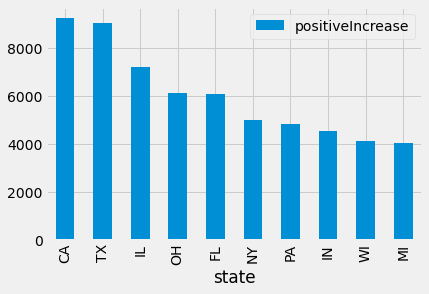

In [29]:
# Make your plot here.
median_covid.plot(kind='bar', y = 'positiveIncrease');

<!-- END QUESTION -->



You'll notice that many of the states that appear in this bar chart are large, highly populated states, like California and Texas. In order to get a more accurate view of the impact of COVID at the statewide level, we'll need to consider the population of each state alongside the raw number of positive test results. Hang on to that thought: we'll be looking at state population data later in this project in Section 6. 

<a id='part1_section4'></a>
### Section 4: Exponential Growth? 🚀

One thing that has caused great concern throughout the pandemic has been the potential for exponential spread of the virus. That's why we often hear health organizations like the Center for Disease Control and the World Health Organization advocating for people to stay at home early, before the growth of the virus swells out of control. Let's see if the virus was spreading exponentially in the US during fall 2020. The easiest way to do that is to look at a data visualization!

**Question 4.1.** Plot a line graph showing the growth of the cumulative **total** number of positive cases in the US throughout the fall. In your plot, the x-axis should represent the days from October 1 to December 31 and the y-axis should represent the total number of positive cases in the US recorded on or before each day. (Don't worry too much about the labels on your x-axis; they may not display in a typical format for a date, and that's fine.) Give your plot a title of "US total cases" by using the keyword argument `title="US total cases"` within the `plot` command.

*Hint*: You should see a smooth curve that increases from left to right. If your curve looks jagged, or shows any decreases, look carefully at the data being used for your x-axis, and make sure it's in chronological order. 

In [61]:
total_positive = covid.groupby(['month','day']).sum()
total_positive


death  deathIncrease  hospitalized  hospitalizedIncrease  \
month day                                                              
10    1    199206            858        403207                  1757   
      2    200039            833        404650                  1443   
      3    200768            729        405738                  1088   
      4    201142            374        406401                   663   
      5    201461            319        407848                  1447   
...           ...            ...           ...                   ...   
12    27   323235           1384        667265                  2302   
      28   324714           1479        670988                  3723   
      29   327999           3285        676249                  5261   
      30   331875           3876        681763                  5514   
      31   335152           3277        686111                  4348   

            negative  negativeIncrease  positive  positiveIncrease  \
month day                                                            
10    1     93693962            768248   7190703             45477   
      2     94632984            939022   7239728             49025   
      3     95430011            797027   7290221             50493   
      4     96216467            786456   7328155             37934   
      5     97047210            830743   7365493             37338   
...              ...               ...       ...               ...   
12    27   188625216           1011283  18873636            152193   
      28   189748583           1123367  19036532            162896   
      29   190697215            948632  19230470            193938   
      30   191662298            965083  19456234            225764   
      31   192781283           1118985  19678837            222603   

           totalTestResults  totalTestResultsIncrease  
month day                                              
10    1           100884665                    813725  
      2           101872712                    988047  
      3           102720232                    847520  
      4           103544622                    824390  
      5           104412703                    868081  
...                     ...                       ...  
12    27          207498852                   1163476  
      28          208785115                   1286263  
      29          209927685                   1142570  
      30          211118532                   1190847  
      31          212460120                   1341588  

[92 rows x 10 columns]

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_1
points: 1
manual: True
-->

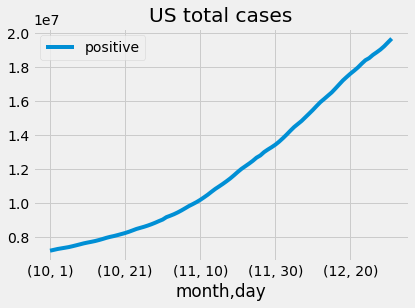

In [62]:
# Make your plot here.
total_positive.plot(kind = 'line', y = "positive",use_index=True, title="US total cases");

<!-- END QUESTION -->



**Question 4.2.** Now, plot a line graph showing the number of **new** positive cases in the US each day throughout the fall. The x-axis should represent the days from October 1 to December 31, and the y-axis should represent the number of new positive cases recorded each day. Give your plot a title of "US new cases" using the `title` keyword argument inside `plot`.

*Hint*: Your curve will have more fluctuations and not be as smooth as the one from Question 4.1.

In [63]:
total_new_positive = covid.groupby(['month','day']).sum()
total_new_positive

death  deathIncrease  hospitalized  hospitalizedIncrease  \
month day                                                              
10    1    199206            858        403207                  1757   
      2    200039            833        404650                  1443   
      3    200768            729        405738                  1088   
      4    201142            374        406401                   663   
      5    201461            319        407848                  1447   
...           ...            ...           ...                   ...   
12    27   323235           1384        667265                  2302   
      28   324714           1479        670988                  3723   
      29   327999           3285        676249                  5261   
      30   331875           3876        681763                  5514   
      31   335152           3277        686111                  4348   

            negative  negativeIncrease  positive  positiveIncrease  \
month day                                                            
10    1     93693962            768248   7190703             45477   
      2     94632984            939022   7239728             49025   
      3     95430011            797027   7290221             50493   
      4     96216467            786456   7328155             37934   
      5     97047210            830743   7365493             37338   
...              ...               ...       ...               ...   
12    27   188625216           1011283  18873636            152193   
      28   189748583           1123367  19036532            162896   
      29   190697215            948632  19230470            193938   
      30   191662298            965083  19456234            225764   
      31   192781283           1118985  19678837            222603   

           totalTestResults  totalTestResultsIncrease  
month day                                              
10    1           100884665                    813725  
      2           101872712                    988047  
      3           102720232                    847520  
      4           103544622                    824390  
      5           104412703                    868081  
...                     ...                       ...  
12    27          207498852                   1163476  
      28          208785115                   1286263  
      29          209927685                   1142570  
      30          211118532                   1190847  
      31          212460120                   1341588  

[92 rows x 10 columns]

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_2
points: 1
manual: True
-->

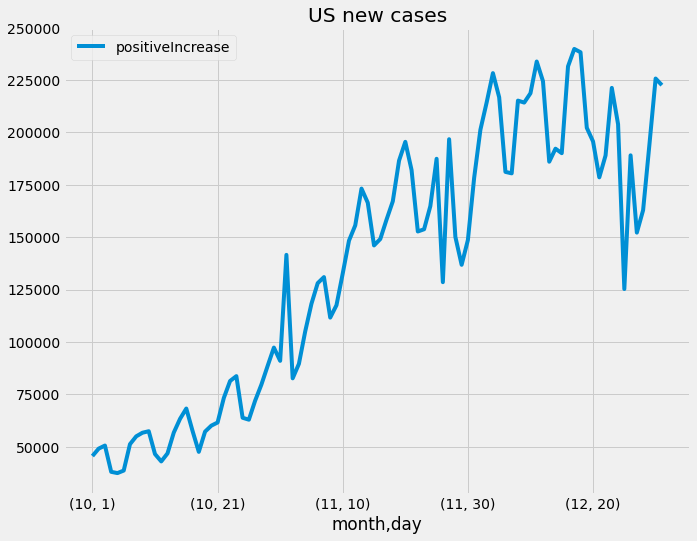

In [64]:
# Make your plot here.
total_new_positive.plot(kind = 'line', use_index=True, y='positiveIncrease', title = 'US new cases',figsize=(10,8));

<!-- END QUESTION -->



From the plot above, we can see that the number of new cases seems to drop in late December; however, due to the large fluctuations throughout, it is hard to tell if there are any other periods in which the COVID situation was improving, with fewer new cases than before. 

To solve this problem, we introduce a *[rolling average](https://en.wikipedia.org/wiki/Moving_average)* to calculate the average number of new cases per day over a [seven-day period](https://gillingscovid19.unc.edu/definitions/7-day-average-of-new-cases), thereby smoothing out daily fluctuations and allowing us to see overall patterns more clearly. In the case of COVID-19, the rolling average is a critical tool to show [significant peaks and valleys over a period of time](https://www.georgiaruralhealth.org/blog/what-is-a-moving-average-and-why-is-it-useful/).

**Question 4.3.** Construct a new DataFrame  called `covid_roll` indexed by the `'month'` and `'day'`, with just one column `'positiveIncreaseRoll'` containing the 7-day rolling average of new positive cases for the entire US, using the data in the `'positiveIncrease'` column of the `covid` DataFrame. Round each rolling average to two decimal places. Since it's not possible to calculate a seven-day rolling average for the first six days of data, `'positiveIncreaseRoll'` should have NaN or 0 for the first 6 days.

To help you get started, we've provided the function `rolling_average` below. Please feel free to use it, but make sure you read through the code to understand what it does. You can also write your own code, if you prefer. 

*Note*: If you are interested, you may also want to look at the function [`DataFrame.rolling()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) as it is a helpful function for calculating rolling averages in `pandas`, but it's not implemented as part of `babypandas`.

In [34]:
def rolling_average(array, window_size):
    """
    function to calculate rolling average 
    
    Parameters
    ----------
    array: array of data values 
    window_size: the number of data points to include in the rolling average

    Returns
    -------
    rolling_averages: array of rolling averages
    
    Examples
    --------
    >>> data = np.array([1,3,5,7,9])
    >>> rolling_average(data,2)
    [nan, 2.0, 4.0, 6.0, 8.0]
    
    >>> data = np.array([1,3,5,6,7,8,10])
    >>> rolling_average(data,3)
    [nan, nan, 3.0, 4.67, 6.0, 7.0, 8.33]
    """
    # Initialize an empty array to store rolling averages.
    rolling_averages = np.array([])

    for i in np.arange(len(array)):
        # Assign np.nan to the initial windows, until we have reached the window_size.
        if i < window_size-1:
            window_average = np.nan
        # Calculate the average of current window.
        else: 
            window_average = round(np.sum(array[i-window_size+1:i+1]) / window_size,2)

        # Store the average of current window in our array of rolling averages.
        rolling_averages = np.append(rolling_averages, window_average)
    return rolling_averages

In [35]:
covid_roll = covid.groupby(by = ['month', 'day']).sum()
average = rolling_average(np.array(covid_roll.get('positiveIncrease')), 7)

covid_roll = covid_roll.assign(positiveIncreaseRoll = average).get(['positiveIncreaseRoll'])
covid_roll

positiveIncreaseRoll
month day                      
10    1                     NaN
      2                     NaN
      3                     NaN
      4                     NaN
      5                     NaN
...                         ...
12    27              179909.29
      28              177670.00
      29              178371.29
      30              179009.71
      31              181674.57

[92 rows x 1 columns]

In [36]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Use the DataFrame `covid_roll` to plot a line graph showing the 7-day average of new cases in the US for each day throughout the fall. Give your plot a title of "US new cases, 7-day average". Your plot should look similar to the plot in Question 4.2, but without as many small fluctuations. In other words, the 7-day rolling average should smooth out the curve, reducing the noise and allowing you to see the broader trends more clearly.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_4
points: 1
manual: True
-->

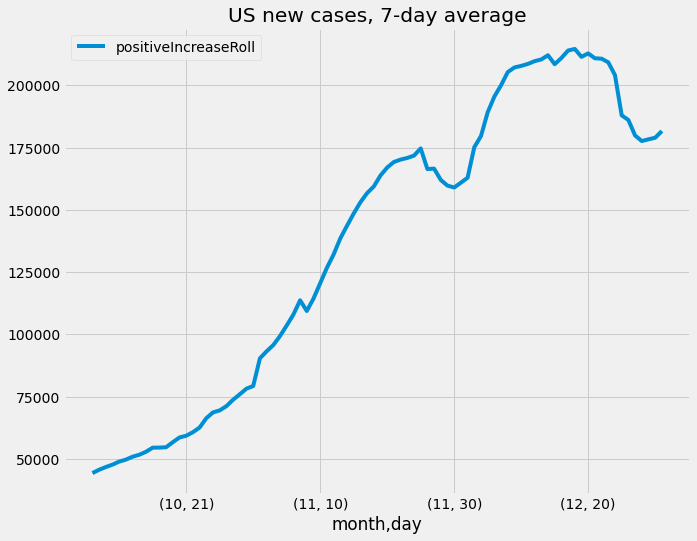

In [65]:
# Make your plot here.
covid_roll.plot(kind = 'line',use_index=True, y = 'positiveIncreaseRoll', title = 'US new cases, 7-day average',figsize=(10,8));

<!-- END QUESTION -->



**Question 4.5.** Based on the plot above, write a few sentences describing the trends in new cases that you see and your interpretations of the peaks and valleys. What are some reasons that could possibly explain these trends and their timing? Consider special events that occur around these times.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_5
points: 1
manual: True
-->

The new cases of Covid in the U.S. has been increasing during the last quarter of 2020. The total number of Covid positive cases droped a little around the end of November and reached a valley.One possible reason is that most people would stay at home during Thanksgiving.Then, the number of cases went back up as we going into December, because people were traveling back from Thanksgiving vocation to work.The number reached its peak towards late-December.One possible reason is that people from all the U.S. were traveling to home for Christmas. 

<!-- END QUESTION -->



Next, we'll generate a similar plot but at the state level, to see how COVID spread differently in different places.

**Question 4.6.** Create a function called `state_trend` that creates a line plot similar to the one you created in Question 4.4, except for an individual state. The function should take as input the two-letter postal code abbreviation for a state and generate the line plot showing that state's seven-day rolling average of new cases, throughout the fall. The function does not need to return anything. Make the title of the plot be "XX new cases, 7-day average", where "XX" is replaced by the two-letter postal code given as input.

Test out your function on a few different states, and use the plots you generate to answer the multiple-choice question below. 

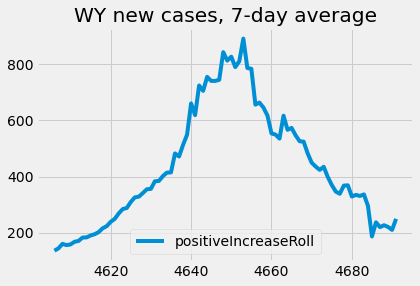

In [69]:
# Define your function here.

def state_trend(state):
    
    state_roll= covid.groupby(by=['state','month','day']).sum().reset_index()
    state_ave = rolling_average(np.array(state_roll[state_roll.get('state')== state].get('positiveIncrease')),7)

    state_roll = state_roll[state_roll.get('state')== state].assign(positiveIncreaseRoll = state_ave ).get(['positiveIncreaseRoll'])
    state_roll.plot(kind='line', use_index=True, y ='positiveIncreaseRoll', title = state + " new cases, 7-day average" );
    
# Test out your function here. Try a few different states!
state_trend('WY')

Which of the following statements is true? Assign 1, 2, 3, or 4 to `q_4_6`.

1. The 7-day average number of new cases in Wyoming (WY) was highest around mid-November.
2. The 7-day average number of new cases in California (CA) during fall 2020 exceeded 50,000.
3. The 7-day average number of new cases in Hawaii (HI) followed approximately the same trend as the national data.
4. Colorado (CO) and South Carolina (SC) showed similar patterns in how the virus spread throughout fall 2020.

In [39]:
q_4_6 = 1
q_4_6

1

In [40]:
grader.check("q4_6")

q4_6 results: All test cases passed!

<a id='part1_section5'></a>
### Section 5: Weekdays vs. Weekends 👔 🆚 🏄
 
In this section, we'll look for patterns involving days of the week. For instance, how does the number of tests on the weekends compare to the number of tests on weekdays? Are there certain days of the week that are more popular for testing, or even days where more patients are hopitalized or dying? Let's find out!

**Question 5.1.** Let's first define a function called `day_of_week` which takes in the date, as a string formatted as month/day/year, and outputs a string indicating the day of the week, for example "Sunday" or "Monday".  

For instance, the in-person DSC 10 Midterm Exam is on Friday, April 29th. When we pass in "4/29/22" as the input parameter, the function `day_of_week` should return "Friday".

*Hint*: First use the `.strptime` function you learned about in Section 2, then use the `datetime` function `.weekday`. See  the [documentation](https://docs.python.org/3/library/datetime.html#datetime.date.weekday) to learn how it works.

Remember to test your function on some dates to make sure it is working properly.

In [41]:
# Define your function here.
def day_of_week(date):
    if datetime.datetime.strptime(date, '%m/%d/%y').weekday() == 0:
        return 'Monday'
    elif datetime.datetime.strptime(date, '%m/%d/%y').weekday() == 1:
        return 'Tuesday'
    elif datetime.datetime.strptime(date, '%m/%d/%y').weekday() == 2:
        return 'Wednesday'
    elif datetime.datetime.strptime(date, '%m/%d/%y').weekday() == 3:
        return 'Thursday'
    elif datetime.datetime.strptime(date, '%m/%d/%y').weekday() == 4:
        return 'Friday'
    elif datetime.datetime.strptime(date, '%m/%d/%y').weekday() == 5:
        return 'Saturday'
    elif datetime.datetime.strptime(date, '%m/%d/%y').weekday() == 6:
        return 'Sunday'
    else:
        return 'Nah'

# Test out your function here. Try a few different dates, 
# and look at a calendar to make sure your function is working correctly.
day_of_week('4/29/22')

'Friday'

In [42]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** Create a new DataFrame called `covid_days` with the same information as `covid`, plus two additional columns:
1. `'dayOfWeek'`: This column should contain the corresponding day of the week for each date (such as "Sunday" or "Monday"). 
2. `'isWeekend'`: This column should contain boolean values, with `True` corresponding to a weekend day (Saturday or Sunday) and `False` corresponding to any other day.

Feel free to create additional functions as needed, but avoid looping through every row in the DataFrame, which takes too long.

In [43]:
covid_weekdays= covid.assign(dayOfWeek = covid.get('date').apply(day_of_week))


In [44]:
def is_weekend(day):
    if (day == 'Saturday') | (day == 'Sunday'):
        return True
    else:
        return False
is_weekend('Friday')

False

In [45]:
covid_days = covid_weekdays.assign(isWeekend = covid_weekdays.get('dayOfWeek').apply(is_weekend))
covid_days

,date,state,death,deathIncrease,hospitalized,hospitalizedIncrease,negative,negativeIncrease,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,month,day,dayOfWeek,isWeekend
0,12/31/20,AK,206,3,1023,6,1230289,8163,45461,495,1275750,8658,12,31,Thursday,False
1,12/31/20,AL,4827,53,34184,353,1583419,8344,361226,4406,1944645,12750,12,31,Thursday,False
2,12/31/20,AR,3676,39,11358,87,1864704,10591,225138,2708,2089842,13299,12,31,Thursday,False
3,12/31/20,AZ,8864,146,37257,473,2339635,15472,520207,7718,2859842,23190,12,31,Thursday,False
4,12/31/20,CA,25386,428,0,0,30610103,205169,2245379,27237,32855482,232406,12,31,Thursday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,10/1/20,VT,58,0,0,0,160608,1004,1759,3,162367,1007,10,1,Thursday,False
4688,10/1/20,WA,2126,2,7533,50,1780567,13210,90372,633,1870939,13843,10,1,Thursday,False
4689,10/1/20,WI,1358,21,7409,109,1434721,11474,132123,3000,1566844,14474,10,1,Thursday,False
4690,10/1/20,WV,354,4,0,0,550564,4844,16024,176,566588,5020,10,1,Thursday,False


In [46]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** Now, using the `covid_days` DataFrame you just created, calculate two values:
1. `weekday_pos_avg`: The average number of new positive tests per weekday, throughout the US.
2. `weekend_pos_avg`: The average number of new positive tests per weekend day, throughout the US.

In [47]:
weekday_pos_avg = covid_days[covid_days.get('isWeekend')==False].get('positiveIncrease').mean()
weekday_pos_avg

2713.0121806298275

In [48]:
grader.check("q5_3a")

q5_3a results: All test cases passed!

In [49]:
weekend_pos_avg = covid_days[covid_days.get('isWeekend')== True].get('positiveIncrease').mean()
weekend_pos_avg

2565.318250377074

In [50]:
grader.check("q5_3b")

q5_3b results: All test cases passed!

**Question 5.4.** What can you conclude, based on the data, about the difference in weekend and weekday tests? Assign 1, 2, 3, or 4 to `q_5_4`.

1. Labs and testing facilities are more likely to be closed on the weekends, which causes the decrease in positive tests on the weekends.
2. People are generally at work or school and interacting with more people on weekdays which causes the increase in positive tests on the weekdays.
3. There is no reason for the difference between weekend and weekday tests, since there is often a lag between when tests are administered and when results come back.
4. There is not enough information to conclude any of the above.

In [51]:
q_5_4 = 4
q_5_4

4

In [52]:
grader.check("q5_4")

q5_4 results: All test cases passed!

**Question 5.5.** Next, let's investigate which day of the week has the largest proportion of positive tests. Create a DataFrame indexed by `'dayOfWeek'`, with just one column called `'proportionPositive'` that contains the proportion of all tests recorded on that day of the week (`'totalTestResultsIncrease'`) that had a positive result (`'positiveIncrease'`). Sort your DataFrame in descending order of `'proportionPositive'` and save your result as `positives_by_day`.

In [53]:
positives_by_day = ...
positives_by_day

Ellipsis

In [54]:
grader.check("q5_5")

q5_5 results:
    q5_5 - 1 result:
        Trying:
            isinstance(positives_by_day, bpd.bpd.DataFrame) and len(positives_by_day.columns) == 1 # Just one column!
        Expecting:
            True
        **********************************************************************
        Line 1, in q5_5 0
        Failed example:
            isinstance(positives_by_day, bpd.bpd.DataFrame) and len(positives_by_day.columns) == 1 # Just one column!
        Expected:
            True
        Got:
            False

In order to visualize the data in the `positives_by_day` DataFrame, we could create a bar chart as follows.

In [55]:
positives_by_day.plot(kind='bar', title='Proportion of Positive Tests on Each Day of the Week');

AttributeError: 'ellipsis' object has no attribute 'plot'

Unfortunately, this bar chart fails to capture something important, which is that the categories (the days of the week) are inherently ordered. It would be more meaningful to see this bar chart with the bars arranged not in descending order of proportions, but in chronological order of days of the week: "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday".

**Question 5.6.** Fill in the missing code to define the variable `chronological_proportions` such that the cell below produces the same bar chart as above, except with the bars arranged in chronological order. Feel free to add additional lines of code as needed, but don't remove or edit anything that's already provided.

In [ ]:
chronological_days = np.array(['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'])

chronological_proportions = ...

chronological_df = bpd.DataFrame().assign(
    dayOfWeek = chronological_days,
    proportionPositive = chronological_proportions
).set_index('dayOfWeek')

chronological_df.plot(kind='bar', title='Proportion of Positive Tests on Each Day of the Week');

In [ ]:
grader.check("q5_6")

**Question 5.7.** True or False? Set the variable `q_5_7` to the boolean `True` or `False`.

> If you need to get COVID tested weekly at a place that provides instant results, you should make a habit of getting your tests done on Mondays, since your chances of getting a positive test result are less if you test on that day. 

In [ ]:
q_5_7 = ...
q_5_7

In [ ]:
grader.check("q5_7")

There certainly seem to be noticeable weekend/weekday differences for COVID tests. Let's now see if there are similar weekend/weekday differences for hospitalizations and deaths.

**Question 5.8.** Create a DataFrame called `hosp_deaths`, indexed by month and day, containing three columns:
1. `'hospitalizedIncrease'`: The total number of new hospitalizations recorded on that day, throughout the entire US.
2. `'deathIncrease'`: The total number of new deaths recorded on that day, throughout the entire US.
3. `'isWeekend'`: `True` for a weekend day (Saturday or Sunday) and `False` otherwise.

Feel free to create additional functions as needed, but avoid looping through every row in the DataFrame, which takes too long.

*Hint*: Start with `covid_days` because that already contains information about which days are weekends.

In [ ]:
hosp_deaths = ...
hosp_deaths

In [ ]:
grader.check("q5_8")

Now we can create a line plot showing the daily trends of nationwide hospitalizations and deaths. The next cell does that for you, marking each weekend with `**` on the x-axis. Do you see any weekly fluctuations?

In [ ]:
hosp_deaths.plot(kind='line')

# Don't edit this part below; simply run it; this code is labeling weekends on the x-axis with **.
weekends = hosp_deaths.get('isWeekend').values.astype(int).astype(str)
weekends = np.where(weekends == '0', '', weekends)
weekends = np.where(weekends != '', '*', weekends)
plt.xticks(np.arange(len(weekends)), weekends);
plt.xlabel('Each ** represents a weekend');

Do people tend to avoid dying on the weekend? Probably not. More likely, the wavy pattern is a byproduct of imperfect data keeping - weekend deaths tend to be reported during the week, when more hospital staff are working. 

The large spike in the hospitalization data is also an anomaly, likely an error in the data.

<a id='part1_section6'></a>
### Section 6: Rates Per 100,000 People 👩‍🦱👦🏾🧑👩🏿‍🦰👩🏽‍🦱🧔👱‍

Without knowing the population of each state, purely comparing the number of positive tests gives a very biased impression of which states are faring better in their battle against the coronavirus. As we saw in Question 3.6, for example, populous states like California and Texas are likely to have more positive tests than states like Wyoming and Vermont, simply because they have far more people. In order to fairly compare states with different populations, we need to look at proportions, or rates. 

In this section, you will use another data set of estimated state populations to add some perspective to the COVID-19 numbers you have seen so far. The population data comes from the [U.S. Census Bureau's Annual Estimates of the Resident Population for the United States, Regions, States, and the District of Columbia: April 1, 2020 to July 1, 2021](https://data.census.gov/cedsci/table?tid=PEPPOP2021.NST_EST2021_POP&hidePreview=false). We will use their annual estimates for July 1, 2020.

Let's begin by reading in the population data located at `data/census_data.csv`.

In [ ]:
census_data = bpd.read_csv('data/census_data.csv')
census_data

The first thing you might notice is that in this data set, states are given by their full name, instead of their two-letter postal code abbreviation. Let's address this mismatch in our two different data sources. To do that, we'll need a way of converting between state name and postal code. For that, we'll introduce yet another data set, this one from the [US Postal Service](https://pe.usps.com/text/pub28/28apb.htm). 

The data is in `data/postal_codes.csv`.

In [ ]:
postal_codes = bpd.read_csv('data/postal_codes.csv')
postal_codes

Notice that this DataFrame has more rows, because in addition to the 50 states and the District of Columbia, this data set also includes US territories, like American Samoa (AS) and Guam (GU).

**Question 6.1.** Write a function called `to_postal_code` that takes as input the name of a US state or territory, and returns the two-letter postal code abbreviation. Then, write another function called `to_name` that takes as input the two-letter postal code of a US state or territory, and returns its name. 

It's okay if your functions don't work on invalid input, such as a postal code of 'ZZ' or a state name of 'Zimbabwe', but they should work correctly for all the states and territories listed in `postal_codes`. Test out each of your functions on a a few inputs to make sure they are working properly.

In [ ]:
# Define your functions here.
...

# Test out your functions here. Try a few different examples!
to_postal_code('Maryland'), to_name('GU')

In [ ]:
grader.check("q6_1")

**Question 6.2.** Create a new DataFrame called `begin_cases` that has 51 rows (one for each state plus DC) and contains four columns:

1. `'state'`: The two-letter postal code abbreviation for the state.
2. `'population'`: The population of the state.
3. `'beginPositive'`: The total number of positive COVID-19 tests recorded for that state, as of October 1, 2020.
4. `'beginPositiveRate'`: As of October 1, 2020, the total number of positive tests per 100,000 people for that state.


In [ ]:
begin_cases = ...
begin_cases

In [ ]:
grader.check("q6_2")

**Question 6.3.** Using `begin_cases`, identify the state that had the highest number of positive tests per 100,000 people, as of **October 1**. Store the two-letter postal code abbreviation of that state in variable `begin_highest`.

In [ ]:
begin_highest = ...
begin_highest

In [ ]:
grader.check("q6_3")

Let's see if this state was able to improve upon its numbers throughout the fall:

In [ ]:
state_trend(begin_highest)

**Question 6.4.** Repeat the above process, except use the end of the given time period instead of the beginning. Name your DataFrame `end_cases`, with columns `'state'`, `'population'`, `'endPositive'`, and `'endPositiveRate'`. Then, find the state that had the highest total number of positive tests per 100,000 people, as of **December 31**. Store the two-letter postal code abbreviation of that state in variable `end_highest`. 

In [ ]:
end_highest = ...
end_highest

In [ ]:
grader.check("q6_4")

Let's see what happened in this state throughout the fall.

In [ ]:
state_trend(end_highest)

<a id='part1_section7'></a>
### Section 7: Mask Mandates 😷

It has long been advocated by public health experts, including the World Health Organization and the Center for Disease Control, that wearing a mask can prevent the spread of COVID-19. We would like to see how this plays out in our data, using a dataset of which states have had state-wide mask mandates and which dates they were in effect. This data comes from an article by [U.S. News and World Report](https://www-usnews-com.cdn.ampproject.org/v/s/www.usnews.com/news/best-states/articles/these-are-the-states-with-mask-mandates?amp_js_v=a6&amp_gsa=1&context=amp&usqp=mq331AQHKAFQArABIA%3D%3D#aoh=16110233502761&referrer=https%3A%2F%2Fwww.google.com&amp_tf=From%20%251%24s&ampshare=https%3A%2F%2Fwww.usnews.com%2Fnews%2Fbest-states%2Farticles%2Fthese-are-the-states-with-mask-mandates) and some webscraping for missing information.

First, as of April 12, 2022, all states in the United States have gotten rid of mask mandates though many states still recommend wearing a mask in indoor settings where social distancing is not possible.

Second, the mandate end date in the dataset is the date when indoor masking for **vaccinated individuals** was no longer required.

Lastly, as the article points out, the details of the mask mandate differed from state to state. There were states that did not issue a state-wide mandate but allowed for individual counties and cities to do so. Some states banned individual counties and cities from implementing a mandate at all. In states that had mandates, they applied in different situations: public transportation, schools, etc. The dataset does not capture such detailed information on the mandates.

The data is located at `data/mask_mandate.csv`. Let's read it in.

In [ ]:
mask_mandate = bpd.read_csv('data/mask_mandate.csv')
mask_mandate

For each state, there is a column containing boolean values corresponding to whether there ever was a mask mandate in that state. For those that did have a mandate at some point, we record the start date and end date of the mandate. For states that reinstated a mask mandate amidst the Omicron variant surge, there are two start and end dates, separated by a comma. 

Currently, the `'mandate_start'` and `'mandate_end'` columns contain strings, which are not very useful to us. For example, the string in the mandate_start column for California (CA) is `'2020-06-18,2021-12-15'`. Let's instead try to separate that into two strings, one for each date.

**Question 7.1.** Create a new DataFrame called `mask_list`. `mask_list` should have a row for all 50 states plus the District of Columbia (DC). It should have four columns:

1. `'state'`: The state's two-letter postal code abbreviation. 
2. `'mandate'`: A boolean, `True` if the state ever had a mask mandate, `False` otherwise.
3. `'start'`: A list of date strings for mask mandate start dates. Each date string should be formatted as YYYY-MM-DD.
4. `'end'`: A list of date strings for mask mandate end dates. Each date string should be formatted as YYYY-MM-DD.

For example, the string in the `'mandate_start'` column for California (CA) is `'2020-06-18,2021-12-15'`. In the new DataFrame, the `'start'` column for California should contain the list `['2020-06-18', '2021-12-15']`. 

*Hint*: The Series method ```str.split``` may be helpful. Note this is a _Series_ method, similar to `str.contains`. It's not the same as the string method `.split()`.

In [ ]:
mask_list = ...
mask_list

In [ ]:
grader.check("q7_1")

We want to figure out the total number of days that each state's mask mandate was in effect. To do that, we need to revisit the `date` object from `datetime`. 

While we could calculate the difference between two dates manually, it is easier to subtract using `date` objects. 

The dates in the `'start'` and `'end'` columns of `mask_list` are in what is called an **[ISO 8601](https://en.wikipedia.org/wiki/ISO_8601)** format (YYYY-MM-DD).

Fortunately, `datetime` has a method, `fromisoformat`, that converts ISO 8601 format dates to `date` objects. Here's an example:

In [ ]:
iso_april_fools = datetime.date.fromisoformat('2022-04-01')
iso_april_fools

Now we'll learn how to calculate the number of days between two dates: all we need to do is subtract the two `date` objects, just like we'd subtract `int`s or `float`s. For example, the time between *April 1st, 2021* and *April 1st, 2022* should be 365 days. 

In [ ]:
april_fools_2021 = datetime.date.fromisoformat('2021-04-01')
april_fools_2022 = datetime.date.fromisoformat('2022-04-01')

diff = april_fools_2022 - april_fools_2021
diff

This says that there are 365 days between these two dates, but instead of just giving the `int` 365, subtracting two `date` objects produces something called a ```timedelta``` object. You do not need to know too much about it, except for the fact that we can extract the information we want (the number of days between two ```date``` objects) by using the ```days``` attribute (not a function!) on the ```timedelta``` object.

In [ ]:
diff.days

This produces a regular old `int`, which we know how to work with.

**Question 7.2.** Create a function called ```calc_duration``` that takes in two lists of date strings of the same length, ```start``` and ```end```, and calculates the total number of days between each pair of corresponding start and end dates in the lists. For guidance, here are some example inputs and expected outputs for the function:

```python
>>> calc_duration(['2022-04-01'], ['2022-04-12'])
11
>>> calc_duration(['2021-04-01', '2022-04-01'], ['2022-04-01', '2022-04-12'])
376
```

In [ ]:
def calc_duration(start, end):
    ...

In [ ]:
grader.check("q7_2")

Before we use the `calc_duration` function on our `mask_list` data, there are rows where `'start'` and `'end'` are missing (the `NaN` values). These `NaN`s are `np.NaN` objects, objects that exist in `numpy` specifically for missing data. We don't know how to deal with missing values yet (it's covered in DSC 80), so let's just work with states that had a mask mandate at some point.

**Question 7.3.** Filter the `mask_list` DataFrame so that it just includes the states that have had mask mandates during the pandemic. Save the result as `had_mandate`.

In [ ]:
had_mandate = ...
had_mandate

In [ ]:
grader.check("q7_3")

You might have noticed that in order to `apply` our `calc_duration` to the data in this DataFrame, we'd need to use values from two different columns, which is something we haven't covered in class. We have therefore implemented the code to `apply` the `calc_duration` function for you. The DataFrame below, called `mask_duration`, has an additional column containing the output of the `calc_duration` function for each row, or the total length of all mask mandates in each state that had a mask mandate.

In [ ]:
# We've written this code for you. You don't need to know how it works; just run it.
mask_duration = had_mandate.assign(duration=had_mandate.apply(lambda x: calc_duration(x['start'], x['end']), axis=1))
mask_duration

To explore the connection between COVID cases and mask mandates, we need to look at the COVID data again. We'll look at the ```begin_cases``` and `end_cases` DataFrames in particular. In case you've forgotten, these DataFrames contain information about the total number of positive cases in each state, and the rate per 100,000 people, at the beginning of fall 2020 (October 1) and the end of fall 2020 (December 31). Run the cells below to recall what these DataFrames look like.

In [ ]:
begin_cases

In [ ]:
end_cases

We want to combine the rates from these DataFrames with the mask mandate durations from the `mask_duration` DataFrame. We've done this for you below to create a new DataFrame called ```rate_duration``` that has a row for all 50 states plus the District of Columbia, and the following columns:

1. ```'state'```: The state abbreviation.
2. ```'beginPositiveRate'```: As of October 1, 2020, the total number of positive tests per 100,000 people for that state.
3. `'endPositiveRate'`: As of December 31, 2020, the total number of positive tests per 100,000 people for that state.
4. ```'duration'```: Total number of days that a mask mandate was in effect for that state. 

In [ ]:
# We've written this code for you. You'll probably understand most of it, 
# except for the how='left' argument in merge, which you don't need to worry about.

rate_duration = (begin_cases
 .merge(mask_duration, how='left', on='state')
 .merge(end_cases, on='state')
 .get(['state', 'beginPositiveRate', 'endPositiveRate', 'duration'])
)
rate_duration

Since the `rate_duration` DataFrame includes states that never had a mask mandate, the missing values, recorded as ```NaN```, are back again. But we know that states that never had a mask mandate had 0 days of mask mandate. Let's fix that.

**Question 7.4.** Create a DataFrame called `complete_mandate` that is exactly the same as `rate_duration`, except the `'duration'` column should have `NaN` values replaced with 0s.

*Note:* ```Numpy``` has a function ```np.isnan()``` that takes in an object and returns `True` if it is a ```np.NaN``` object, `False` otherwise. You cannot check whether a variable `x` is ```np.NaN``` using the `==` symbol such as, 

```python
>>> x == np.NaN
False
```
as it will evaluate to `False` even if ```x``` is actually a ```np.NaN``` object.

Instead, use the ```np.isnan()``` function:

```python
>>> np.isnan(x)
True
```

*Hint:* It might help to create a separate function and `apply` it.

In [ ]:
complete_mandate = ...
complete_mandate

In [ ]:
grader.check("q7_4")

Now that the ```'duration'``` column is all numerical, we can do some data visualization.

**Question 7.5.** Create a scatter plot showing the relationship between each state's total duration of mask mandates and the *change* (increase) in the total number of positive tests per 100,000 people between October 1 and December 31. In your plot, the x-axis should represent the total number of days the mask mandates were in effect and the y-axis should represent the increase in the total number of positive tests per 100,000 people during fall 2020.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q7_5
points: 1
manual: True
-->

In [ ]:
# Make your plot here.
...

<!-- END QUESTION -->



You should see a pretty clear negative association here, showing that the states with longer-lasting mask mandates had fewer new positive cases from October 1, 2020 to December 31, 2020. Of course, some of the mask mandates lasted a lot longer than the time period covered here, which was only 92 days. Therefore, it's not the fact that certain states had mandates lasting hundreds of days that *caused* fewer new positive cases from October 1, 2020 to December 31, 2020, as most of those long-lasting mandates hadn't even happened yet! Rather, a likely confounding factor is that the states that imposed and tolerated long-lasting mandates are the same states where residents were being cautious about gathering in groups, were wearing masks in fall 2020, and were generally following public health directives. 

Let's conclude this section by looking at the state level to see if we can observe the relationship between the imposition of mask mandates and the spread of the virus in particular states. Iowa, for example, instituted a mask mandate on November 17, right in middle of the time period we are looking at. 

In [ ]:
state_trend('IA') 

# This code creates an orange line showing when the mask mandate went into effect. You can ignore this code.
IA_idx = list(covid[covid.get('state')=='IA'].groupby(['month', 'day']).sum().index).index((11, 17))
plt.axvline(IA_idx, color = 'orange');

North Dakota implemented their mask mandate right around the same time, on November 14, and the trend there is similar.

In [ ]:
state_trend('ND') 

# This code creates an orange line showing when the mask mandate went into effect. You can ignore this code.
ND_idx = list(covid[covid.get('state')=='ND'].groupby(['month', 'day']).sum().index).index((11, 14))
plt.axvline(x = ND_idx, color = 'orange');

These graphs certainly seem to suggest that there may be a causal link between mask mandates and improved COVID outcomes, but since we're not looking at a randomized controlled trial, we can't say for certain. In Iowa, for example cases were already trending down when the mandate went into effect, so the cases might have continued to decline either way. As you may know from following the news, the effectiveness of masks and the imposition of mask mandates can be a highly contentious topic that tends to polarize people along political lines.  This leads us to the last and final section of the project, in which you'll look more closely at the connection between politics and COVID-19. Almost done, finish strong! 💪

<a id='part1_section8'></a>
### Section 8: Political Parties 🐘 🐎

As the pandemic has dragged on, we've seen how COVID has become a very political issue fueling lots of debate. In this section, we'll explore how COVID outcomes relate to political affiliation, on a statewide level. We'll address the question of whether COVID has affected Democratic and Republican states equally.

In this section, we'll work with two different datasets. We have cleaned up the data for you by handling missing values, correcting data entry errors, and renaming columns. Our first dataset contains the political party of each state's governor ([source](https://github.com/CivilServiceUSA)). The next contains information on the [popular vote](https://en.wikipedia.org/wiki/United_States_presidential_election#Popular_vote) for the 2020 presidential election, obtained from the [Cook Political Report](https://www.cookpolitical.com/2020-national-popular-vote-tracker). For each state plus Washington, D.C., this dataset records the number of voters who cast their ballots for Joe Biden (the Democratic candidate), for Donald Trump (the Republican candidate), and for some other candidate. 

Run the cells below to read in the data.

In [ ]:
governors = bpd.read_csv('data/governors.csv')
governors

In [ ]:
popular_vote = bpd.read_csv('data/popular_vote.csv')
popular_vote

**Question 8.1.** To start, add a new column to the `popular_vote` DataFrame called `'popParty'` that contains the string "Democratic" or the string "Republican", corresponding to whichever party won more votes in that state during the 2020 presidential election. 

In [ ]:
popular_vote = ...
popular_vote

In [ ]:
grader.check("q8_1")

Now we want to combine this political data with the COVID data we've compiled in the `complete_mandate` DataFrame from Section 7. This will allow us to address the question of how COVID outcomes differed in states with different political leanings.

**Question 8.2.** Create a new DataFrame called `covid_politics` that has one row for each of the 50 US states (not including Washington, D.C.) and contains four columns:

1. `'state'`: The full name of the state.
3. `'endPositiveRate'`: As of December 31, 2020, the total number of positive tests per 100,000 people for that state.
4. `'govParty'`: The political party of the state's governor.
5. `'popParty'`: The political party that was more popular among voters in the 2020 presidential election.

*Hint*: The data you need comes from _three_ different DataFrames!

In [ ]:
covid_politics = ...
covid_politics

In [ ]:
grader.check("q8_2")

**Question 8.3.** Now create a DataFrame called `republican_governors` with the same columns as `covid_politics`, but with rows for only the states with a Republican governor. Similarly, create a `democratic_governors` DataFrame for the states with a Democratic governor.

In [ ]:
republican_governors = ...
republican_governors

In [ ]:
grader.check("q8_3a")

In [ ]:
democratic_governors = ...
democratic_governors

In [ ]:
grader.check("q8_3b")

Let's compare the distribution of positive cases per 100,000 people in states with a Republican governor to the distribution in states with a Democractic governor. Since a histogram shows how a numerical variable is distributed, we need to compare two histograms. The code below does that for you. Run it to see if there was a noticeable difference in COVID cases between states with Republican governors and states with Democratic governors.

In [ ]:
fig, ax = plt.subplots()
covid_bins = np.arange(0, 13000, 1000)
democratic_governors.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w', figsize=(10, 5))
republican_governors.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w')
plt.legend(['Democratic Governor', 'Republican Governor'])
plt.title('Positive COVID-19 Tests Per 100,000 People, as of December 31, 2020');

There certainly seems to be a difference in COVID rates when we break the states into two groups according to the governor's political party. Let's try to quantify just how large this difference is.

**Question 8.4.** Compute the mean COVID rate per 100,000 people as of December 31, 2020 among states with a Republican governor, and similarly, among states with a Democratic governor. Store the difference of those means (Republican minus Democratic) in the variable `difference_by_governor`.

In [ ]:
difference_by_governor = ...
difference_by_governor

In [ ]:
grader.check("q8_4")

Take a minute to think about what this number means. In an average Republican-governed state, as compared to an average Democratic-governed state, an additional `difference_by_governor` many people out of every 100,000 got COVID in 2020. In a way, this number represents the additional risk per 100,000 people, incurred by living in a Republican-governed state during the year 2020.

In the analysis we've done so far, we've divided the states into two groups based on the political party of the governor. But the governor is just one (admittedly, important) person out of millions. Would our results be different if we divided the states into groups based on how their residents voted in the 2020 presidential election? Let's find out!

**Question 8.5.** Since a state's residents elect the governor, we might expect that the governor would come from the same political party that the voters preferred in the 2020 presidential election. That usually happens, but not always. Set `mismatch_states` to an array of states (full names) where the governor's political party is different than the party that was more popular among voters in the 2020 election. 

In [ ]:
mismatch_states = ...
mismatch_states

In [ ]:
grader.check("q8_5")

**Question 8.6.** Next, we'll separate the states into groups based on the popular vote in the 2020 election. Create a DataFrame called `republican_residents` with the same columns as `covid_politics`, but with rows for only the states where the Republican party was more popular in the 2020 election. Similarly, create a `democratic_residents` DataFrame for the states where the Democratic party was more popular in the 2020 election.

In [ ]:
republican_residents = ...
republican_residents

In [ ]:
grader.check("q8_6a")

In [ ]:
democratic_residents = ...
democratic_residents

In [ ]:
grader.check("q8_6b")

Now we'll compare the year-end COVID case rates when we break up the states into political groups in this way. Run the cell below to see the results.

In [ ]:
fig, ax = plt.subplots()
covid_bins = np.arange(0, 13000, 1000)
democratic_residents.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w', figsize=(10, 5))
republican_residents.plot(kind='hist', y='endPositiveRate', density=True, ax=ax, alpha=0.75, bins=covid_bins, ec='w')
plt.legend(['Democratic Residents', 'Republican Residents'])
plt.title('Positive COVID-19 Tests Per 100,000 People, as of December 31, 2020');

The difference between the groups looks even starker in this histogram as compared to the first, when we separated states by the governor's political party. 

As our final step, we'll quantify the additional impact of living in a Republican-voting state on COVID rates.

**Question 8.7.** Set `difference_by_residents` to the average amount of additional risk per 100,000 people incurred by living in a Republican-voting state during the year 2020.

*Hint:* This should be very similar to your solution to Question 8.4.

In [ ]:
difference_by_residents = ...
difference_by_residents

In [ ]:
grader.check("q8_7")

You should find that `difference_by_residents` is larger than `difference_by_governor`. This suggests that the political leanings of the residents are more important to COVID outcomes than the political party of the governor. That aligns with what we suspected when we decided to investigate voter preferences in the first place; the millions of people who live in a state have more of an impact of COVID outcomes than the sole governor. 🤝

## Congratulations! You've completed the Midterm Project! 🎉

All you need to do now is submit your assignment:

1. Select Kernel -> Restart & Run All to ensure that you have executed all cells, including the test cells. **If you do not do this, we may not be able to grade your work!**
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using File -> Download as -> Notebook (.ipynb), then upload your notebook to Gradescope. **Don't forget to add your partner to your group on Gradescope!**

If running all the tests at once causes a test to fail that didn't fail when you ran the notebook in order, check to see if you changed a variable's value later in your code. Make sure to use new variable names instead of reusing ones that are used in the tests.

Remember, the tests here and on Gradescope just check the format of your answers. We will run correctness tests after the assignment's due date has passed.

In [ ]:
grader.check_all()